In [1]:
# example of loading the generator model and generating images

from numpy import load
from numpy.random import randint
from keras.optimizers import Adam
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D

from keras.layers import LeakyReLU
from keras.layers import Dropout
from matplotlib import pyplot


# load and prepare training images
def load_real_samples():
    # load the face dataset
    data = load('img_align_celeba.npz')
    X = data['arr_0']
    # convert from unsigned ints to floats
    X = X.astype('float32')
    # scale from [0,255] to [-1,1]
    X = (X - 127.5) / 127.5
    # load labels
    labels = load('img_align_celeba_labels.npz')
    Y = labels['arr_0']
    return X, Y

def generate_real_samples(dataset, n_samples):
    # choose random instances
    ix = randint(0, dataset.shape[0], n_samples)
    # retrieve selected images
    X = dataset[ix]

    return X

def define_encoder(dimension):
    model = Sequential(name="sequential_encoder")
    # normal
    model.add(Conv2D(128, (4,4), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # downsample to 40x40
    model.add(Conv2D(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # downsample to 20x30
    model.add(Conv2D(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # downsample to 10x10
    model.add(Conv2D(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # downsample to 5x5
    model.add(Conv2D(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # classifier
    model.add(Flatten())
    model.add(Dense(dimension))
    return model

def define_model(generator, encoder):
    model = Sequential()
    generator.trainable = False
    model.add(encoder)
    model.add(generator)
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='mean_squared_error', optimizer=opt)
    return model


    
def train(model, dataset, n_epochs=50, n_batch=128):
    bat_per_epo = dataset.shape[0] // n_batch
    # manually enumerate epochs
    for i in range(n_epochs):
        total_loss = 0
        # enumerate batches over the training set
        for j in range(bat_per_epo):
            # get randomly selected samples
            X = generate_real_samples(dataset, n_batch)
            loss = model.train_on_batch(X, X)
            total_loss+=loss
            print(i+1,j+1,loss)
        print(i+1, total_loss)
    return
# load model
generator = load_model('generator_model_100.h5')
dataset, labels = load_real_samples()
encoder = define_encoder(200)
model = define_model(generator, encoder)
train(model,dataset)
model.layers[0].save('encoder_model.h5')

1 1 0.20362533628940582
1 2 0.18091869354248047
1 3 0.167530819773674
1 4 0.1444573998451233
1 5 0.12890951335430145
1 6 0.13333958387374878
1 7 0.13522697985172272
1 8 0.1289532482624054
1 9 0.11376643180847168
1 10 0.10223990678787231
1 11 0.1038876324892044
1 12 0.09978896379470825
1 13 0.09982529282569885
1 14 0.09192841500043869
1 15 0.09094603359699249
1 16 0.09376829862594604
1 17 0.09121585637331009
1 18 0.08414895832538605
1 19 0.08694274723529816
1 20 0.09044813364744186
1 21 0.09018474817276001
1 22 0.10863249003887177
1 23 0.10697150230407715
1 24 0.09459730982780457
1 25 0.09486988931894302
1 26 0.08624309301376343
1 27 0.07857654243707657
1 28 0.08377525210380554
1 29 0.08063315600156784
1 30 0.07739247381687164
1 31 0.07292323559522629
1 32 0.0765056312084198
1 33 0.07877893000841141
1 34 0.07892749458551407
1 35 0.06755777448415756
1 36 0.07596105337142944
1 37 0.07688300311565399
1 38 0.07579907774925232
1 39 0.07534580677747726
1 40 0.07100846618413925
1 41 0.07201953

5 12 0.046757906675338745
5 13 0.04521636664867401
5 14 0.046718746423721313
5 15 0.046735867857933044
5 16 0.046022552996873856
5 17 0.05100766569375992
5 18 0.04937722533941269
5 19 0.04498070850968361
5 20 0.050591517239809036
5 21 0.05402624234557152
5 22 0.05400104820728302
5 23 0.048454366624355316
5 24 0.04492925480008125
5 25 0.04664571210741997
5 26 0.04642120748758316
5 27 0.044915731996297836
5 28 0.046930380165576935
5 29 0.045611802488565445
5 30 0.04513804614543915
5 31 0.0473947711288929
5 32 0.04529036208987236
5 33 0.04942046478390694
5 34 0.04269164055585861
5 35 0.04798218607902527
5 36 0.04309150576591492
5 37 0.046080198138952255
5 38 0.04710858687758446
5 39 0.045350685715675354
5 40 0.050429705530405045
5 41 0.050545524805784225
5 42 0.05184006690979004
5 43 0.044648636132478714
5 44 0.04936613515019417
5 45 0.04621332138776779
5 46 0.048625726252794266
5 47 0.04806995391845703
5 48 0.04748313128948212
5 49 0.04692566394805908
5 50 0.04536877200007439
5 51 0.0467

9 27 0.043253183364868164
9 28 0.03852364793419838
9 29 0.04101291298866272
9 30 0.040499016642570496
9 31 0.04277188330888748
9 32 0.03841055557131767
9 33 0.03949233889579773
9 34 0.03992248699069023
9 35 0.03934707120060921
9 36 0.0413057766854763
9 37 0.04318978637456894
9 38 0.040074266493320465
9 39 0.037581849843263626
9 40 0.04037310183048248
9 41 0.03849972411990166
9 42 0.04002995789051056
9 43 0.039764534682035446
9 44 0.039664290845394135
9 45 0.039938922971487045
9 46 0.04001481831073761
9 47 0.04006310552358627
9 48 0.04124443978071213
9 49 0.04043342545628548
9 50 0.03781668469309807
9 51 0.04044362157583237
9 52 0.04005046188831329
9 53 0.04282383620738983
9 54 0.04041806235909462
9 55 0.04157613217830658
9 56 0.04220980778336525
9 57 0.04091370105743408
9 58 0.04143037647008896
9 59 0.04288092628121376
9 60 0.04295508563518524
9 61 0.04425504058599472
9 62 0.04483603313565254
9 63 0.04200635105371475
9 64 0.0407462976872921
9 65 0.044392939656972885
9 66 0.040262784808

13 32 0.042983561754226685
13 33 0.03917830437421799
13 34 0.03997523710131645
13 35 0.03853394836187363
13 36 0.04009184241294861
13 37 0.03782860189676285
13 38 0.03466154262423515
13 39 0.0393543541431427
13 40 0.03558504208922386
13 41 0.03758962079882622
13 42 0.03335021808743477
13 43 0.0370023250579834
13 44 0.03553928807377815
13 45 0.03699367120862007
13 46 0.038803715258836746
13 47 0.03670649230480194
13 48 0.035646483302116394
13 49 0.038497067987918854
13 50 0.036557506769895554
13 51 0.03622090443968773
13 52 0.03668825328350067
13 53 0.035845886915922165
13 54 0.03687199205160141
13 55 0.03292177617549896
13 56 0.037069037556648254
13 57 0.035293977707624435
13 58 0.03781960904598236
13 59 0.03760567680001259
13 60 0.04043405503034592
13 61 0.041436467319726944
13 62 0.03985854238271713
13 63 0.04102550446987152
13 64 0.04469982162117958
13 65 0.040618691593408585
13 66 0.038260798901319504
13 67 0.03965403512120247
13 68 0.0363086462020874
13 69 0.0390864722430706
13 70

17 34 0.03983401134610176
17 35 0.038225699216127396
17 36 0.03534700348973274
17 37 0.03810710087418556
17 38 0.03408500552177429
17 39 0.03631068766117096
17 40 0.035985976457595825
17 41 0.03890104591846466
17 42 0.03503816947340965
17 43 0.03413696587085724
17 44 0.03364522382616997
17 45 0.03583430126309395
17 46 0.033304620534181595
17 47 0.036114588379859924
17 48 0.03464559465646744
17 49 0.03608790040016174
17 50 0.03478054702281952
17 51 0.034299276769161224
17 52 0.03310775384306908
17 53 0.03390517830848694
17 54 0.036163706332445145
17 55 0.03703911602497101
17 56 0.03630969673395157
17 57 0.034499987959861755
17 58 0.03790045157074928
17 59 0.03416716307401657
17 60 0.03327080234885216
17 61 0.03314900025725365
17 62 0.03547126427292824
17 63 0.036690305918455124
17 64 0.034957144409418106
17 65 0.03631444275379181
17 66 0.03698596730828285
17 67 0.03599036484956741
17 68 0.034196123480796814
17 69 0.03657401353120804
17 70 0.036554452031850815
17 71 0.0347154438495636
17

21 36 0.033278144896030426
21 37 0.035644397139549255
21 38 0.03343832120299339
21 39 0.030675267800688744
21 40 0.03436737135052681
21 41 0.03374417498707771
21 42 0.031224165111780167
21 43 0.032346367835998535
21 44 0.03515658527612686
21 45 0.036176953464746475
21 46 0.03476710990071297
21 47 0.03477180749177933
21 48 0.034695278853178024
21 49 0.03421366587281227
21 50 0.03177322447299957
21 51 0.03502587229013443
21 52 0.03541436046361923
21 53 0.03598669916391373
21 54 0.03648239001631737
21 55 0.035317204892635345
21 56 0.03438530117273331
21 57 0.03302425518631935
21 58 0.032920919358730316
21 59 0.032235272228717804
21 60 0.03681744262576103
21 61 0.03374374285340309
21 62 0.03597164526581764
21 63 0.03401448577642441
21 64 0.035987816751003265
21 65 0.0336090624332428
21 66 0.03496331349015236
21 67 0.03358917683362961
21 68 0.03500257059931755
21 69 0.03382344916462898
21 70 0.03279615938663483
21 71 0.0334823839366436
21 72 0.037038739770650864
21 73 0.03573690354824066
21

25 38 0.03405538201332092
25 39 0.033124953508377075
25 40 0.03143264353275299
25 41 0.03327253460884094
25 42 0.03411011025309563
25 43 0.034577369689941406
25 44 0.034302957355976105
25 45 0.033323682844638824
25 46 0.031088925898075104
25 47 0.03215998038649559
25 48 0.030961204320192337
25 49 0.03212134540081024
25 50 0.035024333745241165
25 51 0.03438444435596466
25 52 0.03186408802866936
25 53 0.03468095138669014
25 54 0.03508749231696129
25 55 0.03501603752374649
25 56 0.034939125180244446
25 57 0.030629675835371017
25 58 0.03459036350250244
25 59 0.03387238457798958
25 60 0.03505698963999748
25 61 0.0348600298166275
25 62 0.0407961905002594
25 63 0.03986043110489845
25 64 0.03459463641047478
25 65 0.03664569556713104
25 66 0.03389134258031845
25 67 0.033661309629678726
25 68 0.031396057456731796
25 69 0.03326619043946266
25 70 0.03142235800623894
25 71 0.029562868177890778
25 72 0.031773872673511505
25 73 0.03286152705550194
25 74 0.031993743032217026
25 75 0.031842101365327835

29 40 0.031821101903915405
29 41 0.03412572667002678
29 42 0.03171534463763237
29 43 0.028913648799061775
29 44 0.03260326758027077
29 45 0.033644482493400574
29 46 0.03203004598617554
29 47 0.03341970592737198
29 48 0.034198373556137085
29 49 0.03515167161822319
29 50 0.035101424902677536
29 51 0.03231387957930565
29 52 0.03552190214395523
29 53 0.032156895846128464
29 54 0.03166086971759796
29 55 0.031208211556077003
29 56 0.03195490688085556
29 57 0.032991789281368256
29 58 0.0302679892629385
29 59 0.030777372419834137
29 60 0.03282257169485092
29 61 0.031284134835004807
29 62 0.03326701745390892
29 63 0.034239958971738815
29 64 0.03222265839576721
29 65 0.031969644129276276
29 66 0.03105967678129673
29 67 0.03561420366168022
29 68 0.032345034182071686
29 69 0.030931074172258377
29 70 0.032247014343738556
29 71 0.0335950143635273
29 72 0.032969120889902115
29 73 0.035051826387643814
29 74 0.03281806781888008
29 75 0.03404391556978226
29 76 0.029815377667546272
29 77 0.03042701445519

33 40 0.030299223959445953
33 41 0.03107363171875477
33 42 0.02987026982009411
33 43 0.02917681261897087
33 44 0.03081297129392624
33 45 0.03062218241393566
33 46 0.0331198088824749
33 47 0.03198644891381264
33 48 0.03244682401418686
33 49 0.029386673122644424
33 50 0.03401234745979309
33 51 0.03207056596875191
33 52 0.033466290682554245
33 53 0.03190907835960388
33 54 0.03186705708503723
33 55 0.03133358061313629
33 56 0.028390614315867424
33 57 0.028583461418747902
33 58 0.02955782227218151
33 59 0.032000161707401276
33 60 0.033304713666439056
33 61 0.03149620443582535
33 62 0.029985930770635605
33 63 0.030991801992058754
33 64 0.029634764418005943
33 65 0.03171269968152046
33 66 0.029340548440814018
33 67 0.03244301676750183
33 68 0.030922584235668182
33 69 0.032286230474710464
33 70 0.032035116106271744
33 71 0.030195318162441254
33 72 0.03356447070837021
33 73 0.03380994871258736
33 74 0.036063194274902344
33 75 0.0377589613199234
33 76 0.0377851277589798
33 77 0.03301694989204407

37 40 0.03311963006854057
37 41 0.030247533693909645
37 42 0.03298655152320862
37 43 0.03158945590257645
37 44 0.030201241374015808
37 45 0.030010545626282692
37 46 0.03127600997686386
37 47 0.030945993959903717
37 48 0.02915705367922783
37 49 0.029579095542430878
37 50 0.02740319073200226
37 51 0.02947031706571579
37 52 0.030588999390602112
37 53 0.029832586646080017
37 54 0.03222754970192909
37 55 0.03435700386762619
37 56 0.032192863523960114
37 57 0.033709779381752014
37 58 0.031364556401968
37 59 0.0325465053319931
37 60 0.030957426875829697
37 61 0.028834734112024307
37 62 0.03225984051823616
37 63 0.030850322917103767
37 64 0.028760865330696106
37 65 0.02863539755344391
37 66 0.029287293553352356
37 67 0.03262561932206154
37 68 0.028911996632814407
37 69 0.0296687800437212
37 70 0.03136327862739563
37 71 0.026998136192560196
37 72 0.03058486431837082
37 73 0.03032040037214756
37 74 0.02835700660943985
37 75 0.028229570016264915
37 76 0.02936735935509205
37 77 0.03006896935403347

41 39 0.03139351308345795
41 40 0.03329261392354965
41 41 0.0336700901389122
41 42 0.03036455623805523
41 43 0.03417593613266945
41 44 0.03165099397301674
41 45 0.03234484791755676
41 46 0.031136276200413704
41 47 0.03021172247827053
41 48 0.03193250298500061
41 49 0.03019613027572632
41 50 0.02942792698740959
41 51 0.029180023819208145
41 52 0.03007868491113186
41 53 0.031176475808024406
41 54 0.02987840212881565
41 55 0.03136688098311424
41 56 0.029467105865478516
41 57 0.030305780470371246
41 58 0.03106061741709709
41 59 0.02910563535988331
41 60 0.03064117208123207
41 61 0.028539445251226425
41 62 0.030273281037807465
41 63 0.028620688244700432
41 64 0.028688671067357063
41 65 0.028709683567285538
41 66 0.02790367603302002
41 67 0.0271794181317091
41 68 0.028861043974757195
41 69 0.02797408029437065
41 70 0.02963307313621044
41 71 0.02982429973781109
41 72 0.02850995771586895
41 73 0.028808508068323135
41 74 0.027698777616024017
41 75 0.027315005660057068
41 76 0.02786576747894287


45 38 0.030724739655852318
45 39 0.03101377934217453
45 40 0.031080074608325958
45 41 0.029029039666056633
45 42 0.030001716688275337
45 43 0.03219256550073624
45 44 0.02857876755297184
45 45 0.03197931870818138
45 46 0.028776345774531364
45 47 0.030377795919775963
45 48 0.030624933540821075
45 49 0.028932122513651848
45 50 0.031795684248209
45 51 0.028246290981769562
45 52 0.029945295304059982
45 53 0.029677174985408783
45 54 0.02934839576482773
45 55 0.027959562838077545
45 56 0.027392487972974777
45 57 0.028605453670024872
45 58 0.029744600877165794
45 59 0.028303660452365875
45 60 0.027958404272794724
45 61 0.02846207097172737
45 62 0.030684834346175194
45 63 0.030137410387396812
45 64 0.02795395627617836
45 65 0.029546210542321205
45 66 0.028512220829725266
45 67 0.02935096062719822
45 68 0.030990343540906906
45 69 0.029511066153645515
45 70 0.028658000752329826
45 71 0.0313575305044651
45 72 0.029245231300592422
45 73 0.028979001566767693
45 74 0.029897337779402733
45 75 0.029056

49 36 0.0286730844527483
49 37 0.027888527140021324
49 38 0.031079430133104324
49 39 0.02837793342769146
49 40 0.02611991949379444
49 41 0.028144877403974533
49 42 0.030370034277439117
49 43 0.029178407043218613
49 44 0.02911894954741001
49 45 0.026436178013682365
49 46 0.028786277398467064
49 47 0.028890445828437805
49 48 0.02991543337702751
49 49 0.028202837333083153
49 50 0.030328283086419106
49 51 0.02974739857017994
49 52 0.028152192011475563
49 53 0.02926694229245186
49 54 0.027664480730891228
49 55 0.027872854843735695
49 56 0.028982767835259438
49 57 0.029532115906476974
49 58 0.0302302073687315
49 59 0.028884492814540863
49 60 0.028002439066767693
49 61 0.027640340849757195
49 62 0.02928246185183525
49 63 0.02822425216436386
49 64 0.02595031075179577
49 65 0.028227053582668304
49 66 0.030681585893034935
49 67 0.029766984283924103
49 68 0.02682810090482235
49 69 0.028423650190234184
49 70 0.026804259046912193
49 71 0.028045380488038063
49 72 0.02854182943701744
49 73 0.02846774

In [116]:
origin = generate_real_samples(dataset, 2)
example = (model.predict(origin)+1)/2

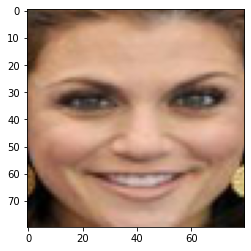

In [117]:
pyplot.imshow((origin+1)[0]/2)

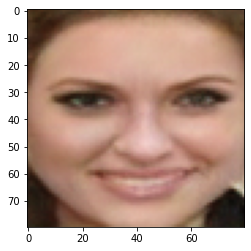

In [118]:
pyplot.imshow(example[0])

1 1 0.01416834443807602
1 2 0.02743971347808838
1 3 0.029328934848308563
1 4 0.028803717344999313
1 5 0.02706357091665268
1 6 0.027553007006645203
1 7 0.031009087339043617
1 8 0.027951635420322418
1 9 0.0273433830589056
1 10 0.031037239357829094
1 11 0.0315399207174778
1 12 0.0323445089161396
1 13 0.031122691929340363
1 14 0.030312562361359596
1 15 0.029388144612312317
1 16 0.0291407760232687
1 17 0.027645103633403778
1 18 0.028306029736995697
1 19 0.027542030438780785
1 20 0.0306299589574337
1 21 0.02819867618381977
1 22 0.028770780190825462
1 23 0.026886316016316414
1 24 0.02608915977180004
1 25 0.02609032578766346
1 26 0.02739579975605011
1 27 0.02750324457883835
1 28 0.027965467423200607
1 29 0.02963905595242977
1 30 0.02929728664457798
1 31 0.028421463444828987
1 32 0.027814241126179695
1 33 0.02701498009264469
1 34 0.029043855145573616
1 35 0.02867092378437519
1 36 0.026551414281129837
1 37 0.029577597975730896
1 38 0.026730556041002274
1 39 0.027191100642085075
1 40 0.0266617462

KeyboardInterrupt: 